In [1]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import sklearn as sk
import matplotlib
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)

2025-12-31 00:26:47.219163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767140807.231222   50129 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767140807.235361   50129 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767140807.245067   50129 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767140807.245077   50129 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767140807.245080   50129 computation_placer.cc:177] computation placer alr

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
path_to_save = "../results/Figures/Figure 6/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [3]:
train = sc.read('../data/pancreas.h5ad')
train.obs["cell_type"] = train.obs["celltype"].tolist()
train

/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/anndata/_io/h5ad.py:267: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{
/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/anndata/_io/h5ad.py:267: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  return AnnData(**{


AnnData object with n_obs × n_vars = 14693 × 2448
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain', 'cell_type'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3'
    uns: 'celltype_colors', 'louvain', 'neighbors', 'pca', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
top_cell_types = train.obs["cell_type"].value_counts().index.tolist()[:6]
top_cell_types.remove("not applicable")
top_cell_types

['alpha', 'beta', 'ductal', 'acinar', 'delta']

In [5]:
train.obs["cell_type"] = "others"
for cell_type in top_cell_types:
    train.obs.loc[train.obs["celltype"] == cell_type, "cell_type"] = cell_type
train.obs["cell_type"].unique()

array(['acinar', 'beta', 'delta', 'others', 'ductal', 'alpha'],
      dtype=object)

In [6]:
train.obs.groupby(['sample', 'celltype']).size()

/tmp/ipykernel_50129/1331252775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.obs.groupby(['sample', 'celltype']).size()


sample  celltype              
Baron   MHC class II                 0
        PSC                          0
        acinar                     958
        activated_stellate         284
        alpha                     2326
                                  ... 
Wang    schwann                      0
        t_cell                       0
        unclassified                 0
        unclassified endocrine       0
        unclear                      0
Length: 96, dtype: int64

### Figure 6.a

/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

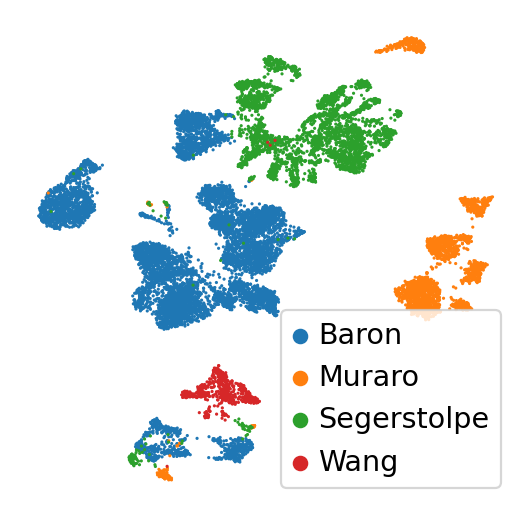

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

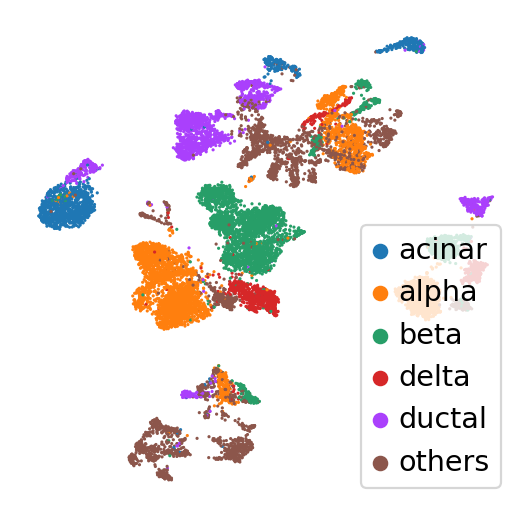

In [7]:
sc.tl.pca(train, svd_solver='arpack')
train.obsm["X_pca"] *= -1
sc.pp.neighbors(train)
sc.tl.umap(train)
sc.pl.umap(train, color=["sample"], title="", legend_loc=False, wspace=.5, show=True, save="_batch.pdf", frameon=False)
sc.pl.umap(train, color=["cell_type"], title="", legend_loc=False, wspace=.5, show=True, save="_celltype.pdf", frameon=False)
os.rename(src=os.path.join(path_to_save, "umap_batch.pdf"), 
          dst=os.path.join(path_to_save, "Fig6a_umap_batch_original.pdf"))
os.rename(src=os.path.join(path_to_save, "umap_celltype.pdf"), 
          dst=os.path.join(path_to_save, "Fig6a_umap_celltype_original.pdf"))

In [8]:
X_pca = train.obsm["X_pca"]
labels = train.obs["batch"].tolist()
print(f" average silhouette_score for original data : {sk.metrics.silhouette_score(X_pca, labels)}")

 average silhouette_score for original data : 0.21305911242961884


In [12]:
%%bash
python3 ../code/pancreas.py

Traceback (most recent call last):
  File "/home/sagemaker-user/scgen-reproducibility/Jupyter Notebooks/../code/pancreas.py", line 6, in <module>
    import scanpy as sc
ModuleNotFoundError: No module named 'scanpy'


CalledProcessError: Command 'b'python3 ../code/pancreas.py\n'' returned non-zero exit status 1.

In [11]:
pancreas_batched = sc.read('../data/reconstructed/scGen/pancreas.h5ad')
pancreas_batched.obs["cell_type"] = train.obs["celltype"].tolist()
pancreas_batched

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../data/reconstructed/scGen/pancreas.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
pancreas_batched.obs.groupby(['study', 'celltype']).size()

In [ ]:
font = {'family' : 'Arial',
        'weight': 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
sc.tl.pca(pancreas_batched, svd_solver='arpack')
pancreas_batched.obsm["X_pca"] *= -1
sc.pp.neighbors(pancreas_batched)
sc.tl.umap(pancreas_batched)
sc.pl.umap(pancreas_batched, title="", palette=matplotlib.rcParams["axes.prop_cycle"], color=["celltype"],
           save="_pancreas_cell_batched.pdf", frameon=False, show=True, legend_fontsize=18)
sc.pl.umap(pancreas_batched, title="", palette=matplotlib.rcParams["axes.prop_cycle"], color=["study"],
           save="_study_pancreas_batched.pdf", frameon=False, show=True, legend_fontsize=18)
os.rename(src=os.path.join(path_to_save, "umap_pancreas_cell_batched.pdf"),
          dst=os.path.join(path_to_save, "Fig6b_umap_scgen_celltype.pdf"))
os.rename(src=os.path.join(path_to_save, "umap_study_pancreas_batched.pdf"),
          dst=os.path.join(path_to_save, "Fig6b_umap_scgen_batch.pdf"))

In [ ]:
X_pca = pancreas_batched.obsm["X_pca"]
labels = pancreas_batched.obs["study"].tolist()
print(f" average silhouette_score for scGen  :{sk.metrics.silhouette_score(X_pca, labels)}")